In [1]:
#1 Install and import all necessary libraries in your Jupyter notebook.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\alexk\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path,'soccer2.csv'))

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,season,date,league_id,league,team1,team2,spi1,spi2,...,xg2,nsxg1,nsxg2,adj_score1,adj_score2,total_goals,goals category,team_ranking_combined,team_difference,goal_difference
0,0,0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,...,NaN,NaN,NaN,NaN,NaN,2.0,average scoring,101.98,1.14,2.0
1,1,1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,...,NaN,NaN,NaN,NaN,NaN,2.0,average scoring,100.64,-7.42,2.0
2,2,2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,...,NaN,NaN,NaN,NaN,NaN,2.0,average scoring,114.49,5.21,0.0
3,3,3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,...,NaN,NaN,NaN,NaN,NaN,0.0,low scoring,105.35,0.65,0.0
4,4,4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,...,NaN,NaN,NaN,NaN,NaN,3.0,average scoring,120.42,-1.56,-1.0


In [51]:
#2 Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
# Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
df2 = df.drop(['Unnamed: 0','Unnamed: 0.1','league','season','date','league_id','team1','team2','goals category','team_ranking_combined','importance1','importance2','xg1',
'xg2','nsxg1','nsxg2','adj_score1','adj_score2' ],axis=1)

In [52]:
df2.dropna()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,total_goals,team_difference,goal_difference
0,51.56,50.42,0.4389,0.2767,0.2844,1.39,1.05,2.0,0.0,2.0,1.14,2.0
1,46.61,54.03,0.3572,0.3608,0.2819,1.27,1.28,2.0,0.0,2.0,-7.42,2.0
2,59.85,54.64,0.4799,0.2487,0.2714,1.53,1.03,1.0,1.0,2.0,5.21,0.0
3,53.00,52.35,0.4289,0.2699,0.3013,1.27,0.94,0.0,0.0,0.0,0.65,0.0
4,59.43,60.99,0.4124,0.3157,0.2719,1.45,1.24,1.0,2.0,3.0,-1.56,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42940,44.88,30.91,0.5766,0.1328,0.2906,1.44,0.54,1.0,0.0,1.0,13.97,1.0
42941,31.95,24.98,0.4035,0.2666,0.3298,1.13,0.86,3.0,2.0,5.0,6.97,1.0
42942,28.57,32.20,0.3985,0.2984,0.3031,1.27,1.06,2.0,0.0,2.0,-3.63,2.0
42943,43.13,22.00,0.5978,0.1439,0.2583,1.68,0.68,2.0,1.0,3.0,21.13,1.0


In [53]:
df2.dtypes

spi1               float64
spi2               float64
prob1              float64
prob2              float64
probtie            float64
proj_score1        float64
proj_score2        float64
score1             float64
score2             float64
total_goals        float64
team_difference    float64
goal_difference    float64
dtype: object

In [54]:
np.any(np.isnan(df2))

False

In [55]:
df2.isnull().sum()

spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
score1             0
score2             0
total_goals        0
team_difference    0
goal_difference    0
dtype: int64

In [56]:
#3 Use the elbow technique as shown in the Jupyter notebook for this Exercise.
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [57]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

score

[-40232409.13997609,
 -21961996.578935098,
 -16383645.25255415,
 -12770144.751050606,
 -10373078.750730447,
 -9041812.13985845,
 -7733845.330418193,
 -6749416.612992589,
 -6044300.224653643]

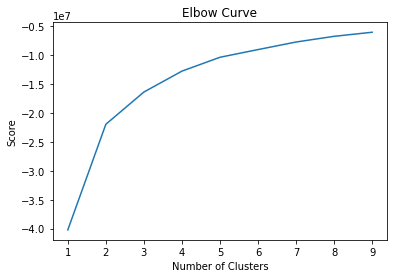

In [58]:
#4 Use the elbow technique as shown in the Jupyter notebook for this Exercise
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#4 Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
The optimal number of clusters is 3 as the curve seems to really straighen out between 3 and 4

In [59]:
#5 Run the k-means algorithm.
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [61]:
kmeans.fit(df2)

C:\Users\alexk\anaconda3\envs\cf\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [64]:
#6 Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\alexk\anaconda3\envs\cf\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [66]:
df2.head()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,total_goals,team_difference,goal_difference,clusters
0,51.56,50.42,0.4389,0.2767,0.2844,1.39,1.05,2.0,0.0,2.0,1.14,2.0,2
1,46.61,54.03,0.3572,0.3608,0.2819,1.27,1.28,2.0,0.0,2.0,-7.42,2.0,1
2,59.85,54.64,0.4799,0.2487,0.2714,1.53,1.03,1.0,1.0,2.0,5.21,0.0,2
3,53.00,52.35,0.4289,0.2699,0.3013,1.27,0.94,0.0,0.0,0.0,0.65,0.0,2
4,59.43,60.99,0.4124,0.3157,0.2719,1.45,1.24,1.0,2.0,3.0,-1.56,-1.0,1


In [65]:
#7 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

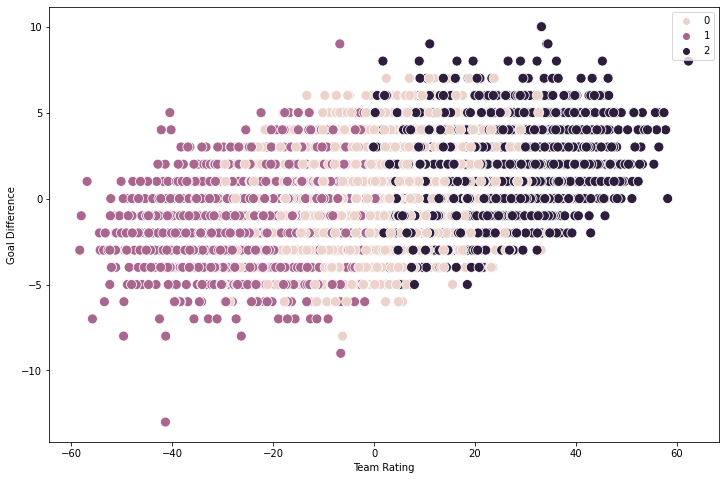

In [72]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['team_difference'], y=df['goal_difference'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Team Rating') 
plt.ylabel('Goal Difference') 
plt.show()

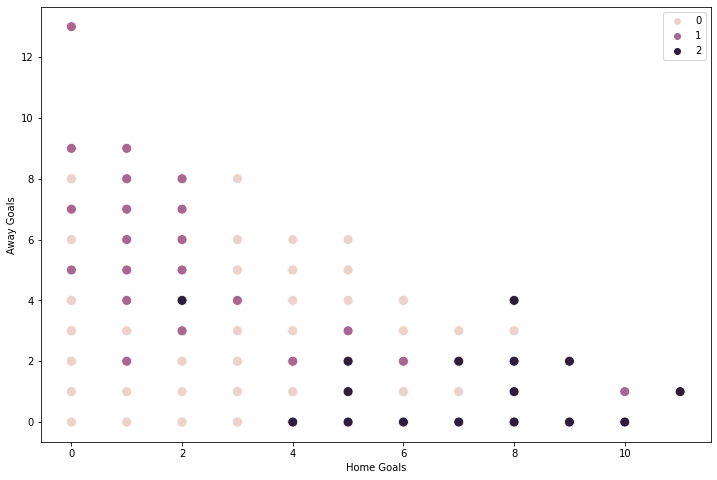

In [73]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['score1'], y=df['score2'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Home Goals') 
plt.ylabel('Away Goals') 
plt.show()

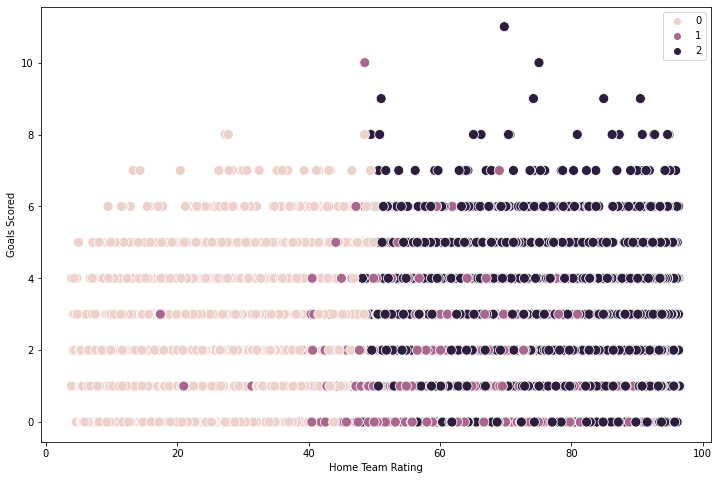

In [75]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['spi1'], y=df['score1'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Home Team Rating') 
plt.ylabel('Goals Scored') 
plt.show()

#8 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further
The 3 clusters seem to be 
0 - Games dominated by the away side
1 - Games that are pretty evenly matched
2 - Games that are dominated by the home team
This does make sensi in the context of the data

In [79]:
df2.groupby('clusters').agg({'spi1':['mean', 'median'], 
                         'spi2':['mean', 'median'], 
                         'total_goals':['mean', 'median'],
                          'goal_difference':['mean', 'median']})

spi1               spi2        total_goals         \
               mean  median       mean median        mean median   
clusters                                                           
0         31.044270  32.030  30.964656  31.99    2.618064    2.0   
1         52.696306  52.090  66.923913  65.30    2.697362    3.0   
2         66.535295  64.575  52.250949  51.65    2.859197    3.0   

         goal_difference         
                    mean median  
clusters                         
0               0.306813    0.0  
1              -0.418378    0.0  
2               1.076916    1.0

#10 Propose what these results could be useful for in future steps of an analytics pipeline.
The can be used to predict the results of future games between teams using their ratings